In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Github/dus_mm/')
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
import numpy as np
import pandas as pd
import utils
import glob

from matplotlib import pyplot as plt
import seaborn as sb
os.chdir('data')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
columnsX = ['freq','AX','BX','BY','CY','CX','DX','DY','AY']
columnsY = ['AX','BX','BY','CY','CX','DX','DY','AY','AQ','AL','BQ','BL','CQ','CL','DQ','DL']
X = pd.DataFrame()
y = pd.DataFrame()
numb_files = len(glob.glob('data_output*'))
for i in glob.glob('data_output*'): 
    numb = i[11]
    if (numb == 'data_output.txt'):
        numb = ''
    y = pd.concat([y,pd.read_table(os.path.join('data_output%s.txt' % numb), header = 0, names = columnsY, 
                                   index_col = False, sep='\s+', engine='python', dtype ='float')], ignore_index = 1)
    X = pd.concat([X,pd.read_table(os.path.join('data_input%s.txt' % numb), header = 0, names = columnsX, 
                                   index_col = False, sep='\s+', engine='python', dtype ="float")], ignore_index = 1)
X = utils.init_in(X)
y = utils.decomposition(y)

In [3]:
X

,freq1,AXBX1,BYCY1,CXDX1,DYAY1,freq2,AXBX2,BYCY2,CXDX2,DYAY2,freq3,AXBX3,BYCY3,CXDX3,DYAY3,freq4,AXBX4,BYCY4,CXDX4,DYAY4
number,,,,,,,,,,,,,,,,,,,,
0,0.0,1.000,0.332,0.026,0.341,0.294,0.318,0.130,0.852,1.000,0.428,0.181,1.000,0.662,0.491,1.0,0.559,0.951,1.000,0.796
1,0.0,0.140,0.462,1.000,0.713,0.233,0.298,1.000,0.130,0.523,0.454,1.000,0.075,0.495,0.549,1.0,0.943,0.685,0.898,1.000
2,0.0,1.000,0.988,0.752,0.603,0.159,0.898,0.340,1.000,0.315,0.269,0.190,0.712,0.387,1.000,1.0,0.876,1.000,0.850,0.875
3,0.0,0.624,1.000,0.483,0.175,0.204,0.434,0.325,0.874,1.000,0.362,1.000,0.486,0.562,0.769,1.0,0.778,0.827,1.000,0.804
4,0.0,1.000,0.544,0.048,0.269,0.348,0.204,0.111,1.000,0.813,0.445,0.418,1.000,0.473,0.549,1.0,0.608,0.700,0.859,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,0.0,0.597,0.603,0.969,1.000,0.165,0.983,0.998,1.000,0.984,0.292,1.000,0.897,0.528,0.625,1.0,0.870,1.000,0.991,0.877
1286,0.0,1.000,0.465,0.406,0.872,0.077,0.647,0.782,1.000,0.693,0.441,0.393,1.000,0.862,0.482,1.0,0.923,0.735,0.713,1.000
1287,0.0,0.257,0.050,0.210,1.000,0.296,0.214,1.000,0.606,0.132,0.511,0.904,0.413,1.000,0.014,1.0,1.000,0.653,0.633,0.421


In [ ]:
np.max(y)

AQ    37.5
AL    37.0
BQ    46.0
BL    36.5
CQ    39.0
CL    34.0
DQ    39.5
DL    34.0
X     56.0
Y     52.0
Q     72.0
L     60.0
dtype: float64

In [ ]:
X.std()

freq1    0.074477
AXBX1    0.358832
BYCY1    0.357179
CXDX1    0.361013
DYAY1    0.357865
freq2    0.206176
AXBX2    0.338657
BYCY2    0.346437
CXDX2    0.340474
DYAY2    0.348445
freq3    0.000000
AXBX3    0.336472
BYCY3    0.333240
CXDX3    0.327306
DYAY3    0.334058
freq4    0.214578
AXBX4    0.211815
BYCY4    0.208091
CXDX4    0.209831
DYAY4    0.211203
dtype: float64

In [ ]:
X1 = X.drop(columns = ['freq3'])

In [ ]:
train_examples = pd.concat([X1,y],axis = 1)

In [ ]:
X1 = X.drop(columns = ['freq1','freq2','freq3','freq4'])
XAXBX = X1[['AXBX1','AXBX2','AXBX3','AXBX4']]

<AxesSubplot:>

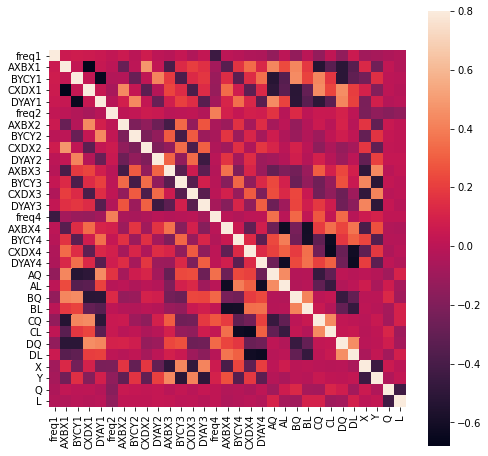

In [ ]:
C_mat = train_examples.corr()
fig = plt.figure(figsize = (8,8))
X1 = X.drop(columns = ['freq3'])
sb.heatmap(C_mat, vmax = .8, square = True)


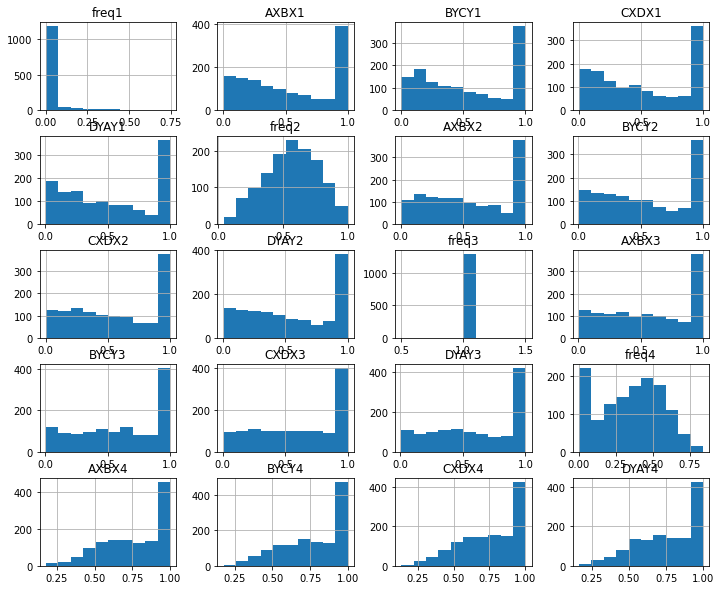

In [ ]:
X.hist(figsize = (12,10))
plt.show()

In [ ]:
y_test

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,0.0,0.0,0.0,13.0,23.0,8.0,7.0,36.0,0.0,40.0,0.0
1,0.0,7.0,18.0,8.0,4.0,0.0,0.0,0.0,0.0,24.0,16.0,0.0
2,0.0,0.0,13.0,0.0,6.0,4.0,0.0,6.0,0.0,10.0,8.0,0.0
3,13.0,1.0,25.0,8.0,0.0,0.0,0.0,0.0,20.0,0.0,32.0,0.0
4,1.0,0.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,12.0,32.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,33.5,10.5,0.0,0.0,0.0,0.0,5.5,2.5,27.0,0.0,0.0,4.0
254,0.0,2.0,4.0,0.0,6.0,0.0,0.0,16.0,0.0,4.0,0.0,0.0
255,0.0,0.0,0.0,0.0,17.0,34.0,3.0,9.0,0.0,22.0,0.0,0.0
256,0.0,0.0,0.0,16.0,6.0,0.0,6.0,0.0,0.0,12.0,0.0,4.0


In [4]:
number_train = round(len(X)*0.8,0)
X_train = X.loc[:number_train]
X_test = X.loc[number_train:]
X_test.reset_index(inplace=True)
X_test = X_test.drop(columns = ['number'])

y_train = y.loc[:number_train]
y_test = y.loc[number_train:]
y_test.reset_index(inplace=True)
y_test = y_test.drop(columns = ['index'])

input_layer = X_test.shape[1]
hidden_layer = 15
output_layer = y.shape[1]

In [5]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = input_layer, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(output_layer, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               2688      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 12)                3084      
Total params: 170,380
Trainable params: 170,380
Non-trainable params: 0
_________________________________________________________________


In [6]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [7]:
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
26/26 [==============================] - 15s 35ms/step - loss: 5.3394 - mean_absolute_error: 5.3394 - val_loss: 5.4858 - val_mean_absolute_error: 5.4858

Epoch 00001: val_loss improved from inf to 5.48580, saving model to Weights-001--5.48580.hdf5
Epoch 2/500
26/26 [==============================] - 0s 4ms/step - loss: 5.2315 - mean_absolute_error: 5.2315 - val_loss: 4.9468 - val_mean_absolute_error: 4.9468

Epoch 00002: val_loss improved from 5.48580 to 4.94678, saving model to Weights-002--4.94678.hdf5
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 4.5916 - mean_absolute_error: 4.5916 - val_loss: 4.6714 - val_mean_absolute_error: 4.6714

Epoch 00003: val_loss improved from 4.94678 to 4.67143, saving model to Weights-003--4.67143.hdf5
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 4.2391 - mean_absolute_error: 4.2391 - val_loss: 4.4718 - val_mean_absolute_error: 4.4718

Epoch 00004: val_loss improved from 4.67143 to 4.471

In [8]:
wights_file = 'Weights-497--0.82521.hdf5'
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [9]:
predictions = NN_model.predict(X_test)

In [12]:
np.sum(y_test,axis =1)

0       46.0
1       40.0
2      105.0
3       81.0
4       71.0
       ...  
253     30.0
254     59.0
255     81.0
256    108.0
257     54.0
Length: 258, dtype: float64

In [15]:
np.sum(pd.DataFrame(np.abs((np.round(predictions,0)), columns = y_test.columns) - y_test, axis = 1)

SyntaxError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [48]:
y_test

,AQ,AL,BQ,BL,CQ,CL,DQ,DL,X,Y,Q,L
0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,6.0,0.0,16.0,16.0,0.0
1,8.0,0.0,0.0,2.0,0.0,4.0,4.0,0.0,6.0,0.0,0.0,16.0
2,0.0,0.0,3.5,22.5,16.5,7.5,0.0,0.0,0.0,15.0,0.0,40.0
3,0.0,0.0,12.0,0.0,10.0,2.0,0.0,1.0,0.0,20.0,36.0,0.0
4,10.0,11.0,0.0,0.0,0.0,0.0,18.0,4.0,0.0,28.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,20.0,0.0
254,13.0,0.0,0.0,1.0,0.0,11.0,0.0,0.0,6.0,0.0,0.0,28.0
255,7.5,3.5,0.0,0.0,0.0,0.0,13.5,17.5,0.0,39.0,0.0,0.0
256,0.0,0.0,0.0,0.0,4.5,3.5,15.5,21.5,15.0,0.0,0.0,48.0


In [28]:
train_X, val_X, train_y, val_y = train_test_split(X_train, y_train, test_size = 0.25, random_state = 14)

In [24]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  2.821029601029601


In [31]:
help(XGBModel.fit)

Help on method fit in module xgboost.sklearn:

fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None, sample_weight_eval_set=None, callbacks=None) method of xgboost.sklearn.XGBRegressor instance
    Fit the gradient boosting model
    
    Parameters
    ----------
    X : array_like
        Feature matrix
    y : array_like
        Labels
    sample_weight : array_like
        instance weights
    eval_set : list, optional
        A list of (X, y) tuple pairs to use as a validation set for
        early-stopping
    sample_weight_eval_set : list, optional
        A list of the form [L_1, L_2, ..., L_n], where each L_i is a list of
        instance weights on the i-th validation set.
    eval_metric : str, callable, optional
        If a str, should be a built-in evaluation metric to use. See
        doc/parameter.rst. If callable, a custom evaluation metric. The call
        signature is func(y_predicted, y_true) where 

In [29]:
XGBModel = XGBRegressor()
XGBModel.fit(train_X,train_y , verbose=False)

# Get the mean absolute error on the validation data :
XGBpredictions = XGBModel.predict(val_X)
MAE = mean_absolute_error(val_y , XGBpredictions)
print('XGBoost validation MAE = ',MAE)

ValueError: ignored

In [26]:
from xgboost import XGBRegressor